In [3]:
import numpy as np
from scipy import ndimage


In [4]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import numpy as np
import scipy.io as scio    
import os,re
from PIL import Image
from scipy import ndimage
from matplotlib import pyplot as plt
import cv2

In [6]:
IMAGE_SIZE = 299

In [7]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [8]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [9]:
def get_filenames(path):
    filenames = []
    for root, dirnames, filenames in os.walk(path):
        filenames.sort(key = natural_keys)
        rootpath = root
    print(len(filenames))
    return filenames

In [11]:
root_path = "/home/wonjae/YongHyeok/Classification_TASK3/dataset"

In [12]:
gt_Task3=np.load(root_path+'/ISIC2018_Task3_Training_GroundTruth.csv')

IOError: Failed to interpret file '/home/wonjae/YongHyeok/Classification_TASK3/dataset/ISIC2018_Task3_Training_GroundTruth.csv' as a pickle

In [27]:
 # save the prediction numpy array to csv

import csv
 
myFile = open('ISIC2018_Task3_Training_GroundTruth.csv', 'w')
with myFile:
    reader = csv.reader(myFile)
print("reading complete")

reading complete


In [28]:
for row in reader:
    print(row)

ValueError: I/O operation on closed file

In [33]:
csv = np.genfromtxt ('/home/wonjae/YongHyeok/Classification_TASK3/ISIC2018_Task3_Training_GroundTruth.csv', delimiter=",")


In [46]:
csv.shape

(10016, 8)

In [40]:
gt_task3=csv[1:]

In [41]:
gt_task3.shape

(10015, 8)

In [42]:
gt_task3

array([[nan,  0.,  1., ...,  0.,  0.,  0.],
       [nan,  0.,  1., ...,  0.,  0.,  0.],
       [nan,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [nan,  0.,  0., ...,  1.,  0.,  0.],
       [nan,  0.,  1., ...,  0.,  0.,  0.],
       [nan,  0.,  1., ...,  0.,  0.,  0.]])

In [45]:
gt_task3[:,1:].shape

(10015, 7)

In [47]:
gt_task3=gt_task3[:,1:]

In [48]:
gt_task3

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [54]:
num_MEL=np.array([])
num_NV=np.array([])
num_BCC=np.array([])
num_AKIEC=np.array([])
num_BKL=np.array([])
num_DF=np.array([])
num_VASC=np.array([])
for i in range(len(gt_task3)) :
    if gt_task3[i][0]==1:
        num_MEL=np.append(num_MEL,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][1]==1:
        num_NV=np.append(num_NV,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][2]==1:
        num_BCC=np.append(num_BCC,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][3]==1:
        num_AKIEC=np.append(num_AKIEC,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][4]==1:
        num_BKL=np.append(num_BKL,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][5]==1:
        num_DF=np.append(num_DF,np.array([i]))
for i in range(len(gt_task3)) :
    if gt_task3[i][6]==1:
        num_VASC=np.append(num_VASC,np.array([i]))

In [105]:
print(num_MEL.shape)
print(num_NV.shape)
print(num_BCC.shape)
print(num_AKIEC.shape)
print(num_BKL.shape)
print(num_DF.shape)
print(num_VASC.shape)

(1113,)
(6705,)
(514,)
(327,)
(1099,)
(115,)
(142,)


In [58]:
import imageio

im = imageio.imread('/home/wonjae/YongHyeok/Classification_TASK3/dataset/task3_segmentation/185_segmentation.png')
print(im.shape)

(299, 299)


In [103]:
img_MEL_seg=seg_im[num_MEL.astype(int)]
img_NV_seg=seg_im[num_NV.astype(int)]
img_BCC_seg=seg_im[num_BCC.astype(int)]
img_AKIEC_seg=seg_im[num_AKIEC.astype(int)]
img_BKL_seg=seg_im[num_BKL.astype(int)]
img_DF_seg=seg_im[num_DF.astype(int)]
img_VASC_seg=seg_im[num_VASC.astype(int)]

In [104]:
np.save('train_task3_seg_MEL.npy',img_MEL_seg)
np.save('train_task3_seg_NV.npy',img_NV_seg)
np.save('train_task3_seg_BCC.npy',img_BCC_seg)
np.save('train_task3_seg_AKIEC.npy',img_AKIEC_seg)
np.save('train_task3_seg_BKL.npy',img_BKL_seg)
np.save('train_task3_seg_DF.npy',img_DF_seg)
np.save('train_task3_seg_VASC.npy',img_VASC_seg)

In [106]:
num_MEL.astype(int)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.

array([    4,     7,     9, ..., 10007, 10010, 10011])

In [107]:
seg_im.shape

(10015, 299, 299)

In [90]:
img_VASC_seg

array([], shape=(0, 10015, 299, 299), dtype=float64)

In [59]:
im

Image([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
filenames_val = get_filenames('/home/wonjae/YongHyeok/Classification_TASK3/dataset/task3_segmentation/')

10015


In [62]:
seg_img = np.array([])
for i in range(10015) :
    seg_img = np.append(seg_img,imageio.imread('/home/wonjae/YongHyeok/Classification_TASK3/dataset/task3_segmentation/'+filenames_val[i]))

In [69]:
seg_im=seg_img.reshape(10015,299,299)

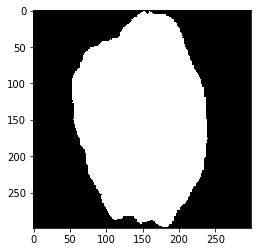

In [71]:
plt.imshow(seg_im[10014], cmap = "gray")
plt.show()

In [72]:
np.save('train_task3_seg.npy',seg_im)